#### Задание по теме «Коллаборативная фильтрация»

ПАКЕТ SURPRISE

используйте данные MovieLens 1M  
можно использовать любые модели из пакета  
получите RMSE на тестовом сете 0.87 и ниже  

Комментарий преподавателя :  
В ДЗ на датасет 1М может не хватить RAM. Можно сделать на 100K.  
Качество RMSE предлагаю считать на основе CrossValidation (5 фолдов), а не отложенном датасете.

In [1]:
#pip install surprise
#!pip install numpy
#!pip install scikit-surprise

In [2]:
#conda update -n base -c defaults conda

In [3]:
#conda install -c conda-forge scikit-surprise

In [357]:
import pandas as pd
import numpy as np

from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold, PredefinedKFold, ShuffleSplit

from tqdm.notebook import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#from scipy.stats import uniform
#from math import sqrt

In [2]:
# Совсем не хватает мощности ПК, даже на 100к
ratings = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Рекомендательные системы\Рекомендации на основе содержания\ratings.csv')
#ratings = ratings.head(50000)  
ratings = ratings.iloc[:50000, :]
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
49995,322,805,3.5,1217676916
49996,322,858,1.5,1217675809
49997,322,912,5.0,1217676046
49998,322,913,3.5,1217675567


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     50000 non-null  int64  
 1   movieId    50000 non-null  int64  
 2   rating     50000 non-null  float64
 3   timestamp  50000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 MB


In [306]:
#dataset = ratings.drop(['timestamp'], axis=1).dropna()
dataset = pd.DataFrame({
    'userId': ratings.userId,
    'movieId': ratings.movieId,
    'rating': ratings.rating
})

dataset.dropna(inplace=True)    # в данном случае dropna() не обязательно
dataset.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [307]:
dataset.rating.min(), dataset.rating.max()

(0.5, 5.0)

In [308]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

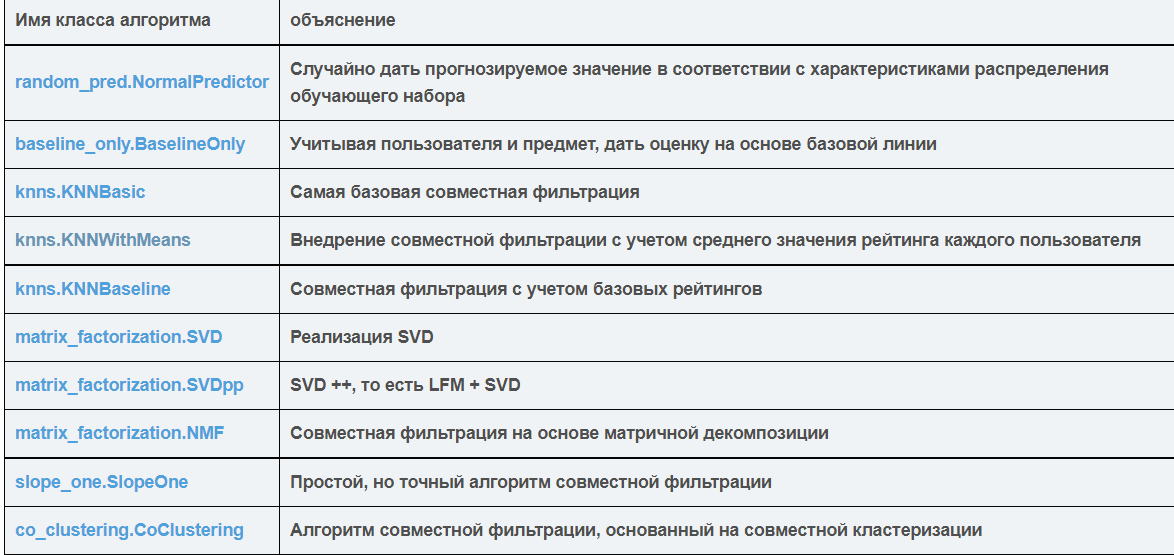

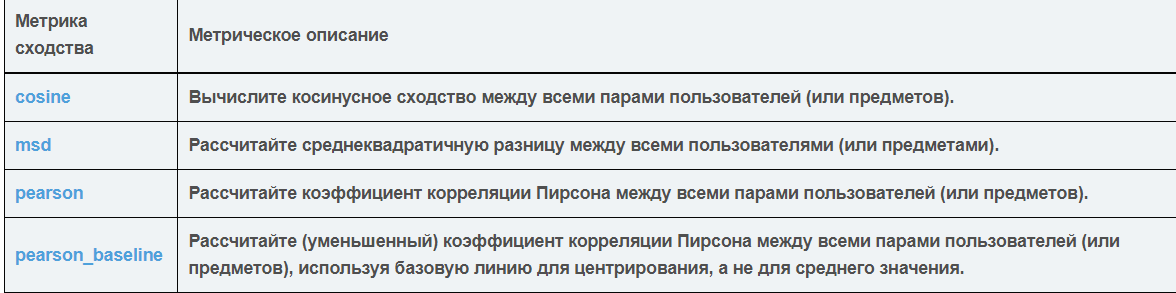

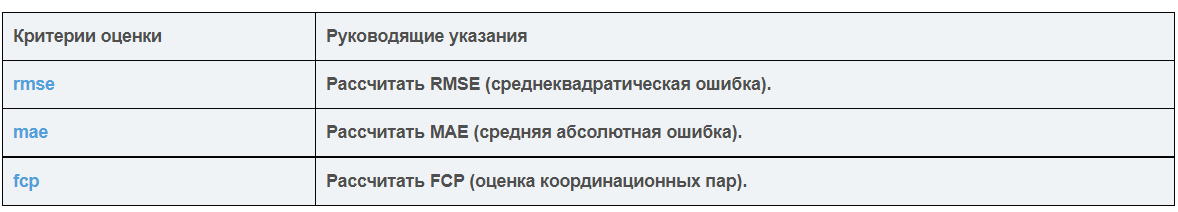

In [7]:
algoritms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), 
             KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()] 

In [15]:
for algoritm in algoritms:
    print(algoritm)
    print(cross_validate(algoritm, data, measures=['RMSE'], cv=5, verbose=False)['test_rmse'].mean())
    print('_____________')
    print()

0.8958264505842107
_____________

0.8906118054323654
_____________

0.9370890707735675
_____________

0.9647684792421425
_____________

1.4332888040777563
_____________

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9069493364686796
_____________

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing sim

<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001F6891DDD90>
0.8958264505842107
_____________

<surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x000001F6891DDDF0>
0.8906118054323654
_____________

<surprise.prediction_algorithms.slope_one.SlopeOne object at 0x000001F6891DD7F0>
0.9370890707735675
_____________

<surprise.prediction_algorithms.matrix_factorization.NMF object at 0x000001F6891DD910>
0.9647684792421425
_____________

<surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x000001F6891DDB20>
1.4332888040777563
_____________

<surprise.prediction_algorithms.knns.KNNBaseline object at 0x000001F6891DD880>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9069493364686796
_____________

<surprise.prediction_algorithms.knns.KNNBasic object at 0x000001F6C5B0D850>
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9928246752398273
_____________

<surprise.prediction_algorithms.knns.KNNWithMeans object at 0x000001F6C5B0D910>
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9270377124070223
_____________

<surprise.prediction_algorithms.knns.KNNWithZScore object at 0x000001F6C5B0D400>
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9272676891620332
_____________

<surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x000001F689E6F070>
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
0.8886587698676898
_____________

<surprise.prediction_algorithms.co_clustering.CoClustering object at 0x000001F689E6F0D0>
0.9797703912291487
_____________


Лучше себя показали алгоритмы SVD, SVDpp, BaselineOnly (до 0.90)

In [80]:
# Use movielens-100K
data2 = Dataset.load_builtin('ml-100k')

##### KNNWithMeans

#слишком долго грузится, отменила ввод

#KNNWithMeans  - базовый алгоритм совместной фильтрации, учитывающий средние оценки каждого пользователя

grid_params = {'k': np.arange(20, 100),    # максимальное количество соседей
               'min_k': np.arange(1, 10),  # минимальное количество соседей
               'sim_options' :{'name': ['cosine', 'pearson', 'pearson_baseline'],   # метрика сходства, 'msd'
                               'user_based': [True, False]} }      # выбор "схожести"
#for i in np.linspace(0.01, 0.5, 20):    
    #trainset, testset = train_test_split(data, test_size = i)        

#data.split(n_folds=3)

#trainset = data.build_full_trainset()

#kf = KFold(n_splits=3)
#for trainset, testset in kf.split(data2):

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gs = GridSearchCV(KNNWithMeans, param_grid=grid_params, cv=cv, measures =['rmse', 'mae'], n_jobs=-1)  #measures, sizes
gs.fit(data2)
#cross_validate(gs, trainset, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)
#gs.best_score['RMSE'], gs.best_params['rmse'], grid.best_params_  # best_params_

#best RMSE score
print(gs.best_score['rmse'])

#combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [107]:
grid_params = {'k': [20, 50, 100],    # максимальное количество соседей
               'min_k': [1, 10],  # минимальное количество соседей
               'sim_options' :{'name': ['cosine', 'pearson', 'pearson_baseline'],   # метрика сходства, 'msd'
                               'user_based': [True, False]} }      # выбор "схожести"

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gs = GridSearchCV(KNNWithMeans, param_grid=grid_params, cv=cv, measures =['rmse', 'mae'], n_jobs=-1)  #measures, sizes
tqdm(gs.fit(data2))

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9269454845827495
{'k': 50, 'min_k': 1, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [109]:
grid_params = {'k': [50, 100],    # максимальное количество соседей
               'min_k': [1, 3],  # минимальное количество соседей
               'sim_options' :{'name': ['cosine', 'pearson', 'pearson_baseline'],   # метрика сходства, 'msd'
                               'user_based': [True, False]} }      # выбор "схожести"

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gs = GridSearchCV(KNNWithMeans, param_grid=grid_params, cv=cv, measures =['rmse', 'mae'], n_jobs=-1)  #measures, sizes
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9323108638751805
{'k': 50, 'min_k': 1, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [120]:
grid_params = {'k': [50, 60],    # максимальное количество соседей
               'min_k': [1, 2],  # минимальное количество соседей
               'sim_options' :{'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],   # метрика сходства, 'msd'
                               'user_based': [True, False]} }      # выбор "схожести"

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
gs = GridSearchCV(KNNWithMeans, param_grid=grid_params, cv=cv, measures =['rmse', 'mae'], n_jobs=-1)  #measures, sizes
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9179591458916068
{'k': 50, 'min_k': 2, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [123]:
grid_params = {'k': [40, 50, 60],    # максимальное количество соседей
               'min_k': [1, 2, 3],  # минимальное количество соседей
               'sim_options' :{'name': ['msd', 'pearson_baseline'],   # метрика сходства, 'msd'
                               'user_based': [False]} }      # выбор "схожести"

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
gs = GridSearchCV(KNNWithMeans, param_grid=grid_params, cv=cv, measures =['rmse', 'mae'], n_jobs=-1)  #measures, sizes
gs.fit(data2)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9254610046369123
{'k': 50, 'min_k': 1, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [199]:
trainset, testset = train_test_split(data, test_size=0.10, random_state=0)
algo = KNNWithMeans(k=40, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.9175215701951196

In [314]:
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = KNNWithMeans(k=40, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

#cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=5, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.9237440544353364

In [416]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

#cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=5, verbose=False, n_jobs=-1)['test_rmse'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.


0.9377026383539743

In [417]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.


0.9195857186934138

In [419]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.01)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.


0.9089881277651989

In [420]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.01)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.


0.9285748794624471

##### SVD

In [119]:
param_grid2 = {'n_epochs': [5, 10], 
               'lr_all': [0.002, 0.005],
               'reg_all': [0.4, 0.6]}
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gs = GridSearchCV(SVD, param_grid = param_grid2, measures=['rmse', 'mae'], cv=5)

#trainset = data.build_full_trainset ()
#grid2.fit(trainset)
#data.split(n_folds=3)

raw_ratings = data2.raw_ratings                                             

# shuffle ratings if you want                                              
random.shuffle(raw_ratings)                                                

# 90% trainset, 10% testset                                                
threshold = int(.9 * len(raw_ratings))                                     
trainset_raw_ratings = raw_ratings[:threshold]                             
test_raw_ratings = raw_ratings[threshold:]                                 

data2.raw_ratings = trainset_raw_ratings  # data is now your trainset       
gs.fit(data2)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.963966535191074
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [94]:
# Use movielens-100K
#data = Dataset.load_builtin('ml-100k')

param_grid = {'n_epochs': [100], 
              'lr_all': [0.006],
              'reg_all': [0.2, 0.3]}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=cv, n_jobs=-1)

gs.fit(data2)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9324038419227684
{'n_epochs': 100, 'lr_all': 0.006, 'reg_all': 0.2}


In [174]:
trainset, testset = train_test_split(data, test_size=0.10)
algo = SVD(n_epochs=50, lr_all=0.017, reg_all=0.096, biased=True)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.9078791745225194

In [176]:
trainset, testset = train_test_split(data2, test_size=0.10)
algo = SVD(n_epochs=20, lr_all=0.017, reg_all=0.096, biased=True)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data2, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.9139808060950623

In [186]:
trainset, testset = train_test_split(data, test_size=0.10)
algo = SVD(n_epochs=20, lr_all=0.008, reg_all=0.05, biased=False)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.9283754880516026

In [332]:
trainset, testset = train_test_split(data, test_size=0.20)
algo = SVD(n_epochs=10, lr_all=0.005, reg_all=0.4)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.2)
cross_validate(algo, data, measures=['rmse', 'fcp'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()


0.9055860638320734

In [355]:
trainset, testset = train_test_split(data2, test_size=0.15)
algo = SVD(n_epochs=50, lr_all=0.005, reg_all=0.4)
algo.fit(trainset)

#cv = ShuffleSplit(n_splits=5, test_size=0.20)
cross_validate(algo, data2, measures=['rmse', 'fcp'], cv=5, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.9562529876238308

In [374]:
trainset, testset = train_test_split(data2, test_size=0.1)
pkf = PredefinedKFold()

trainset2, testset2 = pkf.split(trainset), pkf.split(testset)   
algo = SVD(n_epochs=50, lr_all=0.003, reg_all=0.1)
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions, verbose=True)

#cv = ShuffleSplit(n_splits=5, test_size=0.2)
#cross_validate(algo, data2, measures=['rmse', 'mae'], cv=5, verbose=False, n_jobs=-1)['test_rmse'].mean()


RMSE: 0.9141


0.9140803889868754

In [415]:
trainset, testset = train_test_split(data2, test_size=0.1)
pkf = PredefinedKFold()

trainset2, testset2 = pkf.split(trainset), pkf.split(testset)   
algo = SVD(n_epochs=10, lr_all=0.02, reg_all=0.06)
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9303


0.9302641207198012

In [538]:
trainset, testset = train_test_split(data2, test_size=0.15)
pkf = PredefinedKFold()

trainset2, testset2 = pkf.split(trainset), pkf.split(testset)   
algo = SVD(n_epochs=1000, lr_all=0.003, reg_all=0.1, n_factors=5, biased=True)
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9115


0.9114656756241917

In [544]:
trainset, testset = train_test_split(data2, test_size=0.15, random_state=42)
pkf = PredefinedKFold()

trainset2, testset2 = pkf.split(trainset), pkf.split(testset)   
algo = SVD(n_epochs=100, lr_all=0.006, reg_all=0.2, n_factors=30, biased=True)
algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9325


0.9324503702678146

In [546]:
trainset, testset = train_test_split(data2, test_size=0.15)
algo = SVD(n_epochs=100, lr_all=0.006, reg_all=0.2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.15)
cross_validate(algo, data2, measures=['rmse', 'fcp'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.9334279706941466

In [547]:
trainset, testset = train_test_split(data, test_size=0.15)
algo = SVD(n_epochs=100, lr_all=0.006, reg_all=0.2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.15)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.8820763211663941

In [548]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = SVD(n_epochs=100, lr_all=0.006, reg_all=0.2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.8799229011068143

In [550]:
trainset, testset = train_test_split(data, test_size=0.1)
algo = SVD(n_epochs=100, lr_all=0.006, reg_all=0.1)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

0.8706518848591933

### УРРААА!!!! Я молодец )

##### SVDpp

#слишком долго грузится, отменила ввод  
param_grid = {'n_epochs': [50], 
              'lr_all': [0.002, 0.006],
              'reg_all': [0.3, 0.6]}
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=cv, n_jobs=-1)

gs.fit(data2)

#best RMSE score
print(gs.best_score['rmse'])

#combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

#очень долго грузится, остановила процесс  
modl = SVDpp()  
cv = ShuffleSplit(n_splits=5, test_size=0.15)  
tqdm(cross_validate(modl, data, measures=['rmse'], cv=cv, verbose=True))

#очень долго грузится, остановила процесс  
trainset, testset = train_test_split(data, test_size=0.10, random_state=0)  
algo = SVDpp(n_epochs=20, lr_all=0.008, reg_all=0.05)  
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)  
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

##### BaselineOnly

###### BaselineOnly (ALS)

In [236]:
bsl_options_1 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 100,     # число итераций, по умолчанию 10
                 'reg_u': 5,       # параметр регуляризации для элементов, по умолчанию 15
                 'reg_i': 2}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_1)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.9346497728118427

In [262]:
bsl_options_1 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 100,     # число итераций, по умолчанию 10
                 'reg_u': 5,       # параметр регуляризации для элементов, по умолчанию 15
                 'reg_i': 2}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data, test_size=0.1)
algo = BaselineOnly(bsl_options = bsl_options_1)
algo.fit(trainset)

cross_validate(algo, data, measures=['rmse'], cv=5, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.9423064282352037

In [256]:
bsl_options_1 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 100,     # число итераций, по умолчанию 10
                 'reg_u': 5,       # параметр регуляризации для элементов, по умолчанию 15
                 'reg_i': 2}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data2, test_size=0.1, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_1)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data2, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.9402800210636423

In [432]:
bsl_options_3 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 15,     # число итераций, по умолчанию 10
                 'reg': 1,       
                 'learning_rate': 0.01}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data, test_size=0.15, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_3)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.8910777547516139

In [433]:
bsl_options_3 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 15,     # число итераций, по умолчанию 10
                 'reg': 1,       
                 'learning_rate': 0.01}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_3)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.888631952588117

In [466]:
bsl_options_3 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                 'n_epochs': 25,     # число итераций, по умолчанию 10
                 'reg': 10,       
                 'learning_rate': 0.05}        # параметр регуляризации для пользователей, по умолчанию 10
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_3)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...


0.8848081691745655

###### BaselineOnly (SGD)

In [255]:
bsl_options_2 = {'method': 'sgd',  # метод использования стахостического градиентного спуска
                 'n_epochs': 20,     # число итераций, по умолчанию 20
                 'reg': 0.02,       # параметр регуляризации функции затрат, по умолчанию 0.02
                 'learning_rate': 0.008} # скорость обучения SGD, по умолчанию 0.005

trainset, testset = train_test_split(data, test_size=0.10, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using sgd...


0.9359392478268184

In [284]:
bsl_options_2 = {'method': 'sgd',  # метод использования стахостического градиентного спуска
                 'n_epochs': 20,     # число итераций, по умолчанию 20
                 'reg': 0.02,       # параметр регуляризации функции затрат, по умолчанию 0.02
                 'learning_rate': 0.008} # скорость обучения SGD, по умолчанию 0.005

trainset, testset = train_test_split(data, test_size=0.010, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using sgd...


0.9358207814924275

In [282]:
bsl_options_2 = {'method': 'sgd',  # метод использования стахостического градиентного спуска
                 'n_epochs': 20,     # число итераций, по умолчанию 20
                 'reg': 0.01,       # параметр регуляризации функции затрат, по умолчанию 0.02
                 'learning_rate': 0.007} # скорость обучения SGD, по умолчанию 0.005

trainset, testset = train_test_split(data, test_size=0.01, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using sgd...


0.9354640739281903

In [283]:
bsl_options_2 = {'method': 'sgd',  # метод использования стахостического градиентного спуска
                 'n_epochs': 20,     # число итераций, по умолчанию 20
                 'reg': 0.01,       # параметр регуляризации функции затрат, по умолчанию 0.02
                 'learning_rate': 0.007} # скорость обучения SGD, по умолчанию 0.005

trainset, testset = train_test_split(data2, test_size=0.01, random_state=0)
algo = BaselineOnly(bsl_options = bsl_options_2)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data2, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using sgd...


0.9412094333369769

##### KNNWithZScore

In [305]:
trainset, testset = train_test_split(data, test_size=0.010)
algo = KNNWithZScore(k=50, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.9142685109868802

In [302]:
trainset, testset = train_test_split(data, test_size=0.010)
algo = KNNWithZScore(k=40, min_k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.01, random_state=0)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.9171017772856878

##### KNNBasic

In [318]:
trainset, testset = train_test_split(data, test_size=0.10)
algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1)
cross_validate(algo, data, measures=['rmse'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.9185831707066721

In [327]:
trainset, testset = train_test_split(data, test_size=0.10)
algo = KNNBasic(k=40, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

cv = ShuffleSplit(n_splits=15, test_size=0.1)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.92658192572257

##### KNNBaseline

In [469]:
bsl_options = {'n_epochs': 5,
               'lr_all': 0.002,
               'reg_all': 0.4}        
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = KNNBaseline(bsl_options = bsl_options)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


0.9014442115884279

In [470]:
bsl_options = {'n_epochs': 5,
               'lr_all': 0.002,
               'reg_all': 0.4}        
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = KNNBaseline(bsl_options = bsl_options)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


0.898459877345096

In [492]:
bsl_options = {'n_epochs': 5,
               'k': 60,
               'min_k': 10,
               'lr_all': 0.01,
               'reg_all': 1.2}        
        
trainset, testset = train_test_split(data, test_size=0.1, random_state=0)
algo = KNNBaseline(bsl_options = bsl_options)
algo.fit(trainset)

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cross_validate(algo, data, measures=['rmse', 'mae'], cv=cv, verbose=False, n_jobs=-1)['test_rmse'].mean()

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


0.898459877345096

#### Как улучшить модель?

#### USER-BASED  ('user_based': True)

In [11]:
algo = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [12]:
test_pred = algo.test(testset)

In [13]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 0.9305


0.9305287195101025

In [14]:
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9370  0.9404  0.9275  0.9282  0.9254  0.9317  0.0059  
Fit time          0.13    0.12    0.16    0.15    0.19    0.15    0.02    
Test time         0.53    0.55    0.59    0.63    0.90    0.64    0.13    


{'test_rmse': array([0.93702059, 0.94036554, 0.92751746, 0.92817045, 0.92544123]),
 'fit_time': (0.12647652626037598,
  0.12492823600769043,
  0.15873956680297852,
  0.15280890464782715,
  0.1902637481689453),
 'test_time': (0.5250000953674316,
  0.5455400943756104,
  0.5899338722229004,
  0.6251864433288574,
  0.8967492580413818)}

In [15]:
algo.predict('userId'==2, 'movieId'==1)

Prediction(uid=False, iid=False, r_ui=None, est=3.523875, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [16]:
algo.predict(uid=2, iid=1)

Prediction(uid=2, iid=1, r_ui=None, est=4.177865976237526, details={'actual_k': 60, 'was_impossible': False})

#### SVD

In [17]:
algo2 = SVD()

In [18]:
cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8927  0.8963  0.8937  0.8982  0.8909  0.8944  0.0026  
MAE (testset)     0.6848  0.6895  0.6909  0.6964  0.6854  0.6894  0.0042  
Fit time          4.34    4.19    4.05    3.99    4.09    4.13    0.12    
Test time         0.19    0.11    0.13    0.12    0.11    0.13    0.03    


{'test_rmse': array([0.89267062, 0.89629544, 0.89372901, 0.89823344, 0.89093422]),
 'test_mae': array([0.68480854, 0.68950808, 0.6908794 , 0.69636542, 0.6854406 ]),
 'fit_time': (4.335111379623413,
  4.191997766494751,
  4.048789739608765,
  3.9938466548919678,
  4.088034629821777),
 'test_time': (0.19204306602478027,
  0.11121439933776855,
  0.12837862968444824,
  0.11843228340148926,
  0.11017537117004395)}

#### ITEM=BASED  ('user_based': False)

In [19]:
algo3 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo3.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [20]:
test_pred3 = algo3.test(testset)

In [21]:
accuracy.rmse(test_pred3, verbose=True)

RMSE: 0.9082


0.9082442782284487

In [22]:
new_pred3 = algo3.predict(uid=2, iid=1)
new_pred3

Prediction(uid=2, iid=1, r_ui=None, est=3.8385340525069256, details={'actual_k': 15, 'was_impossible': False})

In [23]:
# не хватает памяти
cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9182  0.9164  0.9345  0.9167  0.9295  0.9231  0.0075  
MAE (testset)     0.7023  0.6980  0.7125  0.6963  0.7077  0.7034  0.0060  
Fit time          7.66    7.16    8.21    7.50    7.48    7.60    0.34    
Test time         6.12    5.99    5.69    5.82    5.

{'test_rmse': array([0.91820502, 0.91644243, 0.93452158, 0.91669584, 0.92953752]),
 'test_mae': array([0.70232326, 0.69804186, 0.71246769, 0.69633607, 0.70767728]),
 'fit_time': (7.6565704345703125,
  7.158407688140869,
  8.209013223648071,
  7.497016906738281,
  7.4763782024383545),
 'test_time': (6.124856472015381,
  5.986578464508057,
  5.690213441848755,
  5.815333127975464,
  5.734440088272095)}

#### KNNBasic

In [24]:
algo4 = KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo4.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [25]:
test_pred4 = algo4.test(testset)

In [26]:
accuracy.rmse(test_pred4, verbose=True)

RMSE: 0.9543


0.95426498729977

In [27]:
cross_validate(algo4, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9313  0.9445  0.9334  0.9265  0.9435  0.9359  0.0070  
Fit time          7.87    7.46    7.52    7.57    7.41    7.57    0.16    
Test time         5.90    5.51    6.32    5.59    5.60    5.78    0.30    


{'test_rmse': array([0.93134054, 0.94453291, 0.93342995, 0.92649628, 0.94353252]),
 'fit_time': (7.868258237838745,
  7.464852809906006,
  7.515703916549683,
  7.569541931152344,
  7.413399934768677),
 'test_time': (5.901578903198242,
  5.506110906600952,
  6.320171594619751,
  5.590221405029297,
  5.600445032119751)}

In [44]:
new_pred4 = algo4.predict(uid=2, iid=1)
new_pred4

Prediction(uid=2, iid=1, r_ui=None, est=4.013896627137984, details={'actual_k': 13, 'was_impossible': False})

In [96]:
mod = {}

for i in np.linspace(0.05, 1, 20):
        trainset, testset = train_test_split(data, test_size=i)
        # KNNWithMeans
        # USER-BASED  ('user_based': True)
        model_1_1_1 = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': True})
        model_1_1_2 = KNNWithMeans(k=40, sim_options={'name': 'cosine', 'user_based': True})
        model_1_1_3 = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': True})
        model_1_1_4 = KNNWithMeans(k=80, sim_options={'name': 'cosine', 'user_based': True})
        model_1_1_5 = KNNWithMeans(k=100, sim_options={'name': 'cosine', 'user_based': True})

        model_1_2_1 = KNNWithMeans(k=20, sim_options={'name': 'pearson', 'user_based': True})
        model_1_2_2 = KNNWithMeans(k=40, sim_options={'name': 'pearson', 'user_based': True})
        model_1_2_3 = KNNWithMeans(k=60, sim_options={'name': 'pearson', 'user_based': True})
        model_1_2_4 = KNNWithMeans(k=80, sim_options={'name': 'pearson', 'user_based': True})
        model_1_2_5 = KNNWithMeans(k=100, sim_options={'name': 'pearson', 'user_based': True})

        model_1_3_1 = KNNWithMeans(k=20, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_1_3_2 = KNNWithMeans(k=40, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_1_3_3 = KNNWithMeans(k=60, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_1_3_4 = KNNWithMeans(k=80, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_1_3_5 = KNNWithMeans(k=100, sim_options={'name': 'pearson_baseline', 'user_based': True})

        # ITEM=BASED  ('user_based': False)
        model_2_1_1 = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': True})
        model_2_1_2 = KNNWithMeans(k=40, sim_options={'name': 'cosine', 'user_based': True})
        model_2_1_3 = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': True})
        model_2_1_4 = KNNWithMeans(k=80, sim_options={'name': 'cosine', 'user_based': True})
        model_2_1_5 = KNNWithMeans(k=100, sim_options={'name': 'cosine', 'user_based': True})

        model_2_2_1 = KNNWithMeans(k=20, sim_options={'name': 'pearson', 'user_based': True})
        model_2_2_2 = KNNWithMeans(k=40, sim_options={'name': 'pearson', 'user_based': True})
        model_2_2_3 = KNNWithMeans(k=60, sim_options={'name': 'pearson', 'user_based': True})
        model_2_2_4 = KNNWithMeans(k=80, sim_options={'name': 'pearson', 'user_based': True})
        model_2_2_5 = KNNWithMeans(k=100, sim_options={'name': 'pearson', 'user_based': True})

        model_2_3_1 = KNNWithMeans(k=20, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_2_3_2 = KNNWithMeans(k=40, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_2_3_3 = KNNWithMeans(k=60, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_2_3_4 = KNNWithMeans(k=80, sim_options={'name': 'pearson_baseline', 'user_based': True})
        model_2_3_5 = KNNWithMeans(k=100, sim_options={'name': 'pearson_baseline', 'user_based': True})

        # KNNBasic
        # ALS
        sim_options = {'name': ['MSD', 'pearson_baseline', 'pearson','cosine'],
                      'user_based': [True, False]}

        bsl_options_1 = {'method': 'als',  # метод использования чередующихся наименьших квадратов (по умолчанию)
                         'n_epochs': 5,     # число итераций, по умолчанию 10
                         'reg_u': 12,       # параметр регуляризации для элементов, по умолчанию 15
                         'reg_i': 15}        # параметр регуляризации для пользователей, по умолчанию 10
        model_3_1 = BaselineOnly(bsl_options = bsl_options_1)

        # SGD
        bsl_options_2 = {'method': 'sgd',  # метод использования стахостического градиентного спуска
                         'n_epochs': 20,     # число итераций, по умолчанию 20
                         'reg': 0.02,       # параметр регуляризации функции затрат, по умолчанию 0.02
                         'learning_rate': 0.008} # скорость обучения SGD, по умолчанию 0.005
        model_3_2 = BaselineOnly(bsl_options = bsl_options_2)

        # model.fit
        model_1_1_1.fit(trainset)
        model_1_1_2.fit(trainset)
        model_1_1_3.fit(trainset)
        model_1_1_4.fit(trainset)
        model_1_1_5.fit(trainset)

        model_1_2_1.fit(trainset)
        model_1_2_2.fit(trainset)
        model_1_2_3.fit(trainset)
        model_1_2_4.fit(trainset)
        model_1_2_5.fit(trainset)
        model_1_3_1.fit(trainset)
        model_1_3_2.fit(trainset)
        model_1_3_3.fit(trainset)
        model_1_3_4.fit(trainset)
        model_1_3_5.fit(trainset)

        # ITEM=BASED  ('user_based': False)
        model_2_1_1.fit(trainset)
        model_2_1_2.fit(trainset)
        model_2_1_3.fit(trainset)
        model_2_1_4.fit(trainset)
        model_2_1_5.fit(trainset)

        model_2_2_1.fit(trainset)
        model_2_2_2.fit(trainset)
        model_2_2_3.fit(trainset)
        model_2_2_4.fit(trainset)
        model_2_2_5.fit(trainset)

        model_2_3_1.fit(trainset)
        model_2_3_2.fit(trainset)
        model_2_3_3.fit(trainset)
        model_2_3_4.fit(trainset)
        model_2_3_5.fit(trainset)

        # KNNBasic
        # ALS
        model_3_1.fit(trainset)

        # SGD
        model_3_2.fit(trainset)
    
        mod[i] = [model_1_1_1, model_1_1_2, model_1_1_3, model_1_1_4, model_1_1_5, 
              model_1_2_1, model_1_2_2, model_1_2_3, model_1_2_4, model_1_2_5, 
              model_1_3_1, model_1_3_2, model_1_3_3, model_1_3_4, model_1_3_5,
              model_2_1_1, model_2_1_2, model_2_1_3, model_2_1_4, model_2_1_5,
              model_2_2_1, model_2_2_2, model_2_2_3, model_2_2_4, model_2_2_5,
              model_2_3_1, model_2_3_2, model_2_3_3, model_2_3_4, model_2_3_5,
              model_3_1, model_3_2]

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done

Done computing similarity matrix.
Estimating biases using als...
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usin

Estimating biases using als...
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_bas

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

In [102]:
for i, j in mod.items():
    print('test_size = ', i)
    for t, jj in enumerate(j):
        print('Индекс модели = ', t)
        print(cross_validate(jj, data, measures=['RMSE'], cv=5))
        print()
    print(________________________)

test_size =  0.05
Индекс модели =  0
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.93818673, 0.93322665, 0.9318038 , 0.91751731, 0.93209848]), 'fit_time': (0.27323317527770996, 0.2650563716888428, 0.27244043350219727, 0.26625537872314453, 0.3607783317565918), 'test_time': (0.8756260871887207, 0.8758857250213623, 0.8507311344146729, 0.8733141422271729, 0.8817179203033447)}

Индекс модели =  1
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.93169515, 0.92795404, 0.94699006, 0.9395702 , 0.93749801]), 'fit_time': (0.31393885612487793, 0.3280973434448242, 0.329697847366333, 0.32311367988586426, 0.3287496566772461), 'test_time': (0.9295170307159424, 0.907322883605957, 0.9074447154998779, 0.9200022220611572, 0.9154908657073975)}

Индекс модели =  22
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.9182918 , 0.94254767, 0.9622461 , 0.93718224, 0.92519023]), 'fit_time': (0.31268811225891113, 0.32807326316833496, 0.32915377616882324, 0.3131875991

NameError: name '________________________' is not defined

In [ ]:
tabl = {}
for i, j in mod.items():
    cross = []
    for jj in j:
        cross.append(cross_validate(jj, data, measures=['RMSE'], cv=5)['test_rmse'].mean())
    tabl[i] = cross        

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Compu

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done c

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done comp

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similari

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
C

In [106]:
tabl

{0.05: [0.9304366024836466,
  0.9302666496168784,
  0.9303015521442644,
  0.9288185993008111,
  0.9314905522816954,
  0.9357157054103702,
  0.9378026658343905,
  0.9370441757391352,
  0.9342684893882632,
  0.9354490410683998,
  0.9418247989741065,
  0.943475461532725,
  0.9411093775500486,
  0.9398997204510156,
  0.9396999424068696,
  0.9303428213856622,
  0.9298586540775435,
  0.9307739198998487,
  0.9303425702682322,
  0.9295042494459181,
  0.9376103022049291,
  0.9347623627731687,
  0.9367046549944504,
  0.9364840477303907,
  0.9335468133904117,
  0.9368231633777679,
  0.9424723096589032,
  0.9444142226929939,
  0.9408175369052927,
  0.9411681217460102,
  0.8932382085809124,
  0.8876107135475113],
 0.1: [0.9309162626428764,
  0.930648754600867,
  0.9312265911369151,
  0.9313141099420619,
  0.9343958422733889,
  0.9378549196114114,
  0.9362759955380398,
  0.9346719366710362,
  0.9348779431579451,
  0.937903209946283,
  0.943417416407877,
  0.9405501550002479,
  0.9410849716884092,
  